## LSTM testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2025-02-14 10:13:10.175053: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-14 10:13:10.175792: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 10:13:10.178061: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 10:13:10.184637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-14 10:13:10.194934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

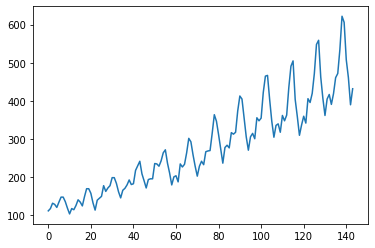

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('../Processed_data/testing.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
tf.random.set_seed(7)

In [4]:
# load the dataset
dataframe = pd.read_csv('../Processed_data/testing.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
look_back = 8

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size - look_back:len(dataset),:]
print(len(train), len(test))

96 56


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX[:5]

array([[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984557, 0.08494207, 0.08494207],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
        0.08494207, 0.08494207, 0.06177607],
       [0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
        0.08494207, 0.06177607, 0.02895753],
       [0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
        0.06177607, 0.02895753, 0.        ],
       [0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
        0.02895753, 0.        , 0.02702703]], dtype=float32)

In [10]:
trainY.shape

(87,)

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
trainX.shape, trainY.shape

((87, 1, 8), (87,))

In [13]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, ))


model.add(Dense(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, shuffle=True)

Epoch 1/100


2025-02-14 10:13:24.582040: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-02-14 10:13:24.582076: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: Hotdog-Ubuntu
2025-02-14 10:13:24.582082: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: Hotdog-Ubuntu
2025-02-14 10:13:24.582265: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 470.256.2
2025-02-14 10:13:24.582285: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 470.256.2
2025-02-14 10:13:24.582290: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 470.256.2
/home/jo/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to

87/87 - 3s - 31ms/step - loss: 0.0281
Epoch 2/100
87/87 - 0s - 1ms/step - loss: 0.0160
Epoch 3/100
87/87 - 0s - 983us/step - loss: 0.0096
Epoch 4/100
87/87 - 0s - 1ms/step - loss: 0.0063
Epoch 5/100
87/87 - 0s - 977us/step - loss: 0.0058
Epoch 6/100
87/87 - 0s - 992us/step - loss: 0.0056
Epoch 7/100
87/87 - 0s - 963us/step - loss: 0.0054
Epoch 8/100
87/87 - 0s - 954us/step - loss: 0.0052
Epoch 9/100
87/87 - 0s - 997us/step - loss: 0.0050
Epoch 10/100
87/87 - 0s - 1ms/step - loss: 0.0049
Epoch 11/100
87/87 - 0s - 1ms/step - loss: 0.0048
Epoch 12/100
87/87 - 0s - 1ms/step - loss: 0.0046
Epoch 13/100
87/87 - 0s - 995us/step - loss: 0.0045
Epoch 14/100
87/87 - 0s - 1ms/step - loss: 0.0044
Epoch 15/100
87/87 - 0s - 996us/step - loss: 0.0043
Epoch 16/100
87/87 - 0s - 1ms/step - loss: 0.0042
Epoch 17/100
87/87 - 0s - 1ms/step - loss: 0.0041
Epoch 18/100
87/87 - 0s - 1ms/step - loss: 0.0040
Epoch 19/100
87/87 - 0s - 1ms/step - loss: 0.0039
Epoch 20/100
87/87 - 0s - 1ms/step - loss: 0.0038
Epoc

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 21.78 RMSE


In [15]:
trainY

array([[136.00000531, 119.00000078, 103.99999952, 117.99999916,
        115.00000199, 125.99999674, 140.99999801, 135.00000368,
        125.00000283, 148.9999956 , 169.99999891, 169.99999891,
        157.99999481, 133.00000042, 114.00000036, 139.99999638,
        145.00000452, 149.99999723, 177.9999965 , 163.00000295,
        172.00000217, 177.9999965 , 198.99999982, 198.99999982,
        184.00000627, 162.00000133, 146.00000615, 165.9999924 ,
        171.00000054, 179.99999976, 193.00000549, 181.00000139,
        183.00000464, 217.99999988, 230.00000398, 241.99999264,
        209.00000066, 191.00000223, 172.00000217, 194.00000712,
        195.99999493, 195.99999493, 235.99999831, 234.99999668,
        229.00000235, 242.99999427, 263.99999759, 272.00001061,
        236.99999994, 211.00000392, 179.99999976, 201.00000308,
        203.99999252, 187.99999735, 234.99999668, 226.9999991 ,
        233.99999506, 263.99999759, 301.99999771, 292.99999849,
        259.00000488, 229.00000235, 203.

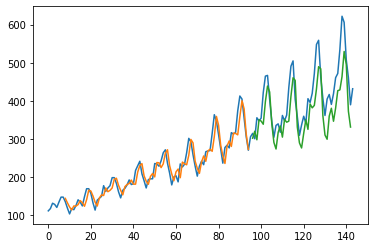

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()